Load data

In [6]:
import numpy as np
import pandas as pd

from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib.dates import DayLocator, DateFormatter
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1 import host_subplot

%matplotlib widget

FOCAL_FILE = "res/focal_length.txt"
TEMPERATURE_FILE = "res/surface_velocities/temperature_processed.parquet"


icepy_dir = Path.cwd().parents[0]

data = pd.read_csv(icepy_dir / FOCAL_FILE, parse_dates=True)
data["date"] = pd.to_datetime(data["date"], format="%Y_%m_%d")
temp = pd.read_parquet(icepy_dir / TEMPERATURE_FILE)

NameError: name 'data' is not defined

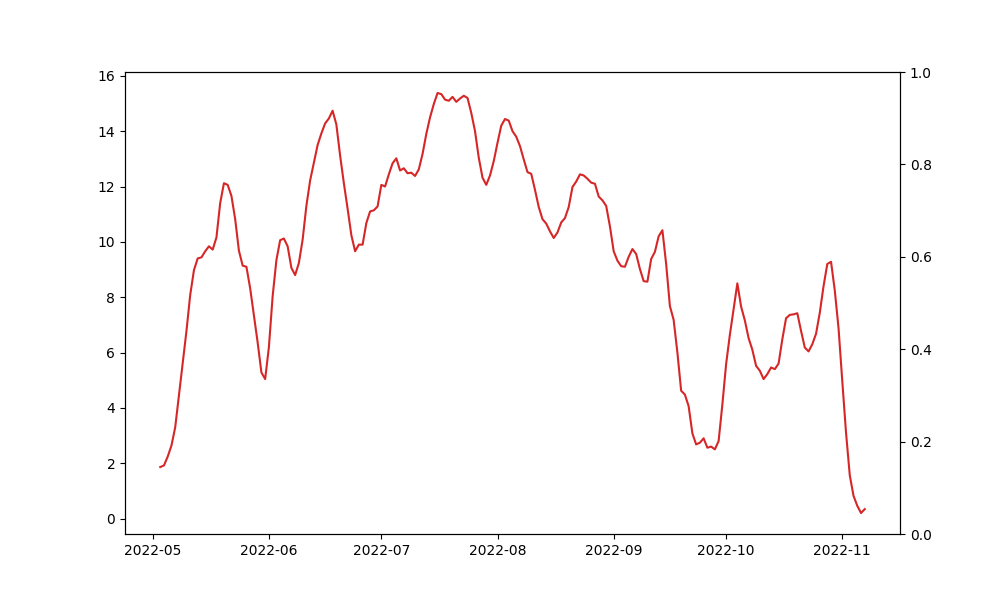

In [7]:
fig, host = plt.subplots(figsize=(10, 6))
par = host.twinx()

p1 = host.plot(temp["data"], temp["Tavg_5d"], label="Temperature",color="tab:red")
p2 = par.plot(data["date"], data["f1"], label="Focal Length", color="tab:blue")
# p2 = par.plot(data["date"], data["f2"], label="Focal Length", color="tab:green")

In [ ]:
omega1 = data["omega1"] - data["omega1"].mean()
omega2 = data["omega2"] - data["omega2"].mean()
phi1 = data["phi1"] - data["phi1"].mean()
phi2 = data["phi2"] - data["phi2"].mean()
k1 = data["kappa1"] - data["kappa1"].mean()
k2 = data["kappa2"] - data["kappa2"].mean()

# omega1 = data["omega1"] - data["omega1"][0] 
# omega2 = data["omega2"] - data["omega2"][0]
# phi1 = data["phi1"] - data["phi1"][0]
# phi2 = data["phi2"] - data["phi2"][0]
# k1 = data["kappa1"] - data["kappa1"][0]
# k2 = data["kappa2"] - data["kappa2"][0]

# fig, ax = plt.subplots(figsize=(10, 6))
# ax.plot(data["date"], k1, label="k1",color="tab:red")
# ax.plot(data["date"], k2, label="k2",color="tab:blue")
# ax.legend()

# fig, ax = plt.subplots(figsize=(10, 6))
# ax.plot(data["date"], omega1, label="omega1",color="tab:red")
# ax.plot(data["date"], omega2, label="omega2",color="tab:blue")
# ax.legend()

# fig, ax = plt.subplots(figsize=(10, 6))
# ax.plot(data["date"], phi1, label="phi1",color="tab:red")
# ax.plot(data["date"], phi2, label="phi2",color="tab:blue")
# ax.legend()


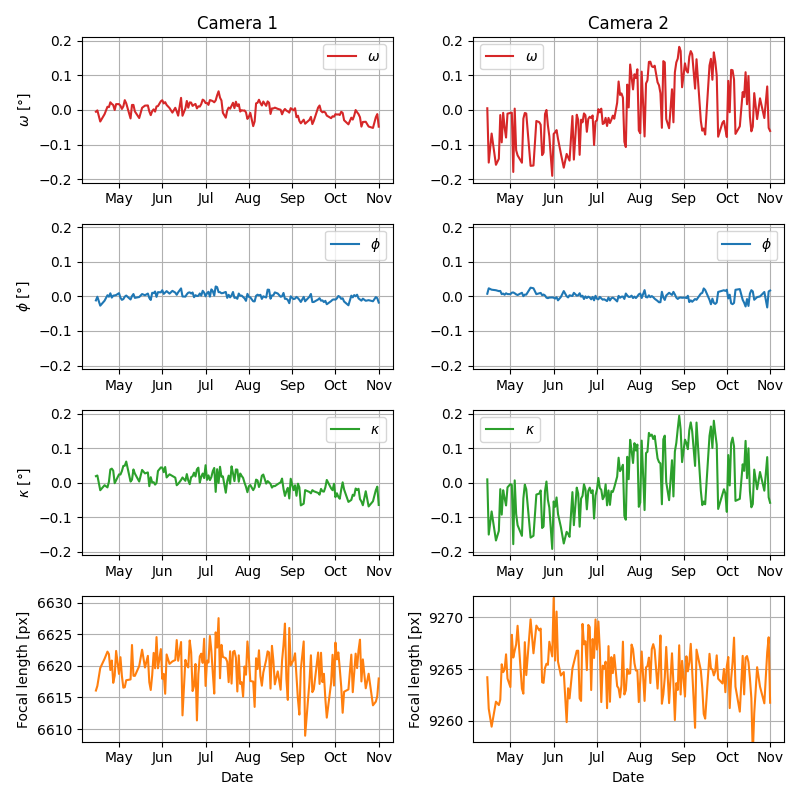

In [ ]:
def set_ax_proprierties(ax, ylabel=None, ylim=None, legend=True, xlabel=False):
    if xlabel:
        ax.set_xlabel("Date")
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    dateFmt = DateFormatter('%b')
    ax.xaxis.set_major_formatter(dateFmt)
    ax.xaxis.set_major_locator(DayLocator(interval=30))
    ax.grid()
    if ylim is not None:
        ax.set_ylim(ylim)
    if legend:
        ax.legend()
    # ax.plot(temp["data"], temp["Tavg_5d"]-temp["Tavg_5d"].mean(), label="Temperature",color="tab:red", linewidth=0.5, linestyle="--")


fig, axes = plt.subplots(4,2, figsize=(8, 8))
# Camera 1
axes[0,0].set_title("Camera 1")
axes[0,0].plot(data["date"], omega1, label="$\omega$",color="tab:red")
set_ax_proprierties(axes[0,0], "$\omega$ [$\degree$]", (-0.21,0.21)) #(-0.07,0.07))
axes[1,0].plot(data["date"], phi1, label="$\phi$",color="tab:blue")
set_ax_proprierties(axes[1,0], "$\phi$ [$\degree$]", (-0.21,0.21)) 
axes[2,0].plot(data["date"], k1, label="$\kappa$",color="tab:green")
set_ax_proprierties(axes[2,0], "$\kappa$ [$\degree$]", (-0.21,0.21)) 

axes[3,0].plot(data["date"], data["f1"], label="Focal Length", color="tab:orange")
set_ax_proprierties(axes[3,0], "Focal length [px]",  ylim=(6608, 6631), legend=False, xlabel=True)

# Camera 2
axes[0,1].set_title("Camera 2")
axes[0,1].plot(data["date"], omega2, label="$\omega$",color="tab:red")
set_ax_proprierties(axes[0,1],  ylim= (-0.21,0.21))
axes[1,1].plot(data["date"], phi2, label="$\phi$",color="tab:blue")
set_ax_proprierties(axes[1,1], ylim=(-0.21,0.21))
axes[2,1].plot(data["date"], k2, label="$\kappa$",color="tab:green")
set_ax_proprierties(axes[2,1],  ylim= (-0.21,0.21))
axes[3,1].plot(data["date"], data["f2"], label="Focal Length", color="tab:orange")
set_ax_proprierties(axes[3,1], "Focal length [px]", ylim=(9258, 9272), legend=False, xlabel=True)
fig.tight_layout()

Image residuals and matching/tracking statistics

In [ ]:
import numpy as np
import pandas as pd

from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib.dates import DayLocator, DateFormatter
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1 import host_subplot

IMAGE_RESIDUALS_FILE = "res/residuals_image.txt"
MATCHING_TRACKING_RES_FILE = "res/matching_tracking_results.txt

icepy_dir = Path.cwd().parents[0]

# Read data
img_res = pd.read_csv(icepy_dir / IMAGE_RESIDUALS_FILE, parse_dates=True)
matching_res = pd.read_csv(icepy_dir / MATCHING_TRACKING_RES_FILE, parse_dates=True)

# Convert date to datetime
img_res["epoch"] = pd.to_datetime(img_res["epoch"], format="%Y_%m_%d")
for lab in ["day_cur", "day_before"]:
    matching_res[lab] = pd.to_datetime(matching_res[lab], format="%Y_%m_%d")

FileNotFoundError: [Errno 2] No such file or directory: '/home/francesco/phd/icepy4d/res/residuals_image.txt'

NameError: name 'img_res' is not defined

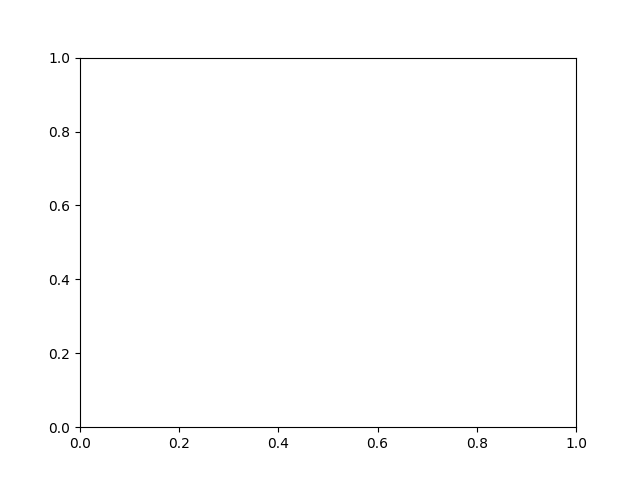

In [ ]:
fig, ax = plt.subplots()

ax.plot(img_res["epoch"], img_res["count-track_id"], label="Features", color="tab:red", linewidth=0.5, linestyle="--")
h2 = ax.twinx()
h2.plot(img_res["epoch"], img_res["mean-global_norm"], label="Reprojection error", color="tab:blue", linewidth=1, linestyle="-")

plt.show()

In [ ]:
import seaborn as sns

epochs = img_res["epoch"]
avg_residuals = img_res["mean-global_norm"]
std_residuals = img_res["std-global_norm"]

clrs = sns.color_palette("husl",1)
fig, ax = plt.subplots()
ax.plot(epochs, avg_residuals, label="Average reprojection error", c=clrs[0], linewidth=2)
ax.fill_between(epochs, avg_residuals-std_residuals, avg_residuals+std_residuals ,alpha=0.2, facecolor=clrs[0], label="Standard deviation")

ax.set_ylabel("Reprojection error [px]")
dateFmt = DateFormatter('%b')
ax.xaxis.set_major_formatter(dateFmt)
ax.grid(which="both", linestyle="--", alpha=0.5)
ax.grid(which="major", axis="y", linewidth=0.5, color="black")
ax.grid(which="major", axis="x", linewidth=0.5, color="black")


ax.legend()
fig.tight_layout()

fig.savefig(icepy_dir / "res/fig_for_paper/reprojection_error.png", dpi=300)

KeyError: 'epoch'

In [ ]:
import seaborn as sns

epochs = matching_res["day_cur"]
tracked = matching_res["n_tracked"]
matched = matching_res["n_new_matches"]
valid =  matching_res["n_valid"]

clrs = sns.color_palette("husl",3)
fig, ax = plt.subplots()
ax.plot(epochs, valid, label="matched features", c=clrs[0], linewidth=1)
ax.fill_between(epochs, np.zeros_like(matched), valid, alpha=0.2, facecolor=clrs[0])
ax.plot(epochs, tracked, label="tracked features", c=clrs[1], linewidth=1)

ax.set_ylabel("Number of features")
dateFmt = DateFormatter('%b')
ax.xaxis.set_major_formatter(dateFmt)
ax.grid(which="both", linestyle="--", alpha=0.5)
ax.grid(which="major", axis="y", linewidth=0.5, color="black")
ax.grid(which="major", axis="x", linewidth=0.5, color="black")

ax.legend()
fig.tight_layout()

plt.show()

fig.savefig(icepy_dir / "res/fig_for_paper/matching_tracking_stats.png", dpi=300)

NameError: name 'matching_res' is not defined

In [ ]:
ratio = tracked / valid
ratio.mean()

In [3]:
p1_fname = icepy_dir / "res/fig_for_paper/img_stats/image_list_pi1_jpg.csv"
p2_fname = icepy_dir / "res/fig_for_paper/img_stats/image_list_pi2_jpg.csv"

pi1_stats = pd.read_csv(p1_fname, parse_dates=True)
pi2_stats = pd.read_csv(p2_fname, parse_dates=True)
processed_days = matching_res[["epoch", "day_cur"]]
processed_days.columns = ["epoch", "date"]

pi1_stats["date"] = pd.to_datetime(pi1_stats["date"], format="%Y:%m:%d")
pi2_stats["date"] = pd.to_datetime(pi2_stats["date"], format="%Y:%m:%d")

# Define the date range
start_date = matching_res["day_cur"].iloc[0]
end_date = matching_res["day_cur"].iloc[-1]
date_range = pd.date_range(start_date, end_date, freq='D')

# keep only the dates in the date range and drop duplicates
pi1_stats = pi1_stats[pi1_stats["date"].isin(date_range)]
pi1_stats.drop_duplicates(subset="date", inplace=True)

pi2_stats = pi2_stats[pi2_stats["date"].isin(date_range)]
pi2_stats.drop_duplicates(subset="date", inplace=True)

# Set 'dates' as the DataFrame index
pi1_stats.set_index('date', inplace=True)
pi2_stats.set_index('date', inplace=True)
processed_days.set_index('date', inplace=True)

df_reindexed = pi1_stats.reindex(date_range)
missing_dates_1 = df_reindexed[df_reindexed.isnull().all(axis=1)].index

df_reindexed = pi2_stats.reindex(date_range)
missing_dates_2 = df_reindexed[df_reindexed.isnull().all(axis=1)].index

df_reindexed = processed_days.reindex(date_range)
discarded_days = df_reindexed[df_reindexed.isnull().all(axis=1)].index

df_reindexed = processed_days.reindex(date_range)
discarded_days = df_reindexed[df_reindexed.isnull().all(axis=1)].index

NameError: name 'matching_res' is not defined

In [4]:
def plot_missing_dates(date_range, camera1_days, missing_dates_1, camera2_days= None, missing_dates_2 = None, lables = None, marker_size=3):
    
    if lables is None:
        lables = ["C1", "C2"]

    plotting_distance = 1

    # Plotting
    clrs = sns.color_palette("Paired",6)
    camera1_days = pi1_stats.index

    if camera2_days is not None:
        fig, ax = plt.subplots(figsize=(12, 1.5))
    else:
        fig, ax = plt.subplots(figsize=(12, 0.5))
    
    # plot days 
    ax.plot(date_range, np.ones(len(date_range)), 'g-', linewidth=2, alpha=0.5)

    # Plot day with images
    ax.plot(camera1_days, np.ones(len(camera1_days)), 'o', c=clrs[1], label=f"Valid shots {lables[0]}", markersize=marker_size)

    # Highlight missing days
    ax.plot(missing_dates_1, np.ones(len(missing_dates_1)), 'o', c=clrs[0],label=f"Discarded shots {lables[0]}",markersize=marker_size)


    if camera2_days is not None:
        ax.plot(camera2_days, np.ones(len(camera2_days))*(1-plotting_distance), 'o', c=clrs[3], label=f"Valid shots {lables[1]}", markersize=marker_size)
        ax.plot(missing_dates_2, np.ones(len(missing_dates_2))*(1-plotting_distance), 'o', c=clrs[2],label=f"Discarded shots {lables[1]}", markersize=marker_size)

    # Formatting the plot
    ax.set_yticks([])
    ax.set_ylim(1-plotting_distance - plotting_distance/2, 1+plotting_distance/2)
    x_min = date_range[0] - pd.to_timedelta(2, unit='d')
    x_max = date_range[-1] + pd.to_timedelta(2, unit='d')
    ax.set_xlim([x_min, x_max])

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    dateFmt = DateFormatter('%b')
    ax.xaxis.set_major_formatter(dateFmt)
    ax.grid(linestyle="--", alpha=0.5)
    ax.grid(axis="x", linewidth=0.5, color="black")

    fig.tight_layout()
    plt.show()

    return fig

# plot_missing_dates(date_range, pi1_stats.index, missing_dates_1, pi2_stats.index, missing_dates_2, marker_size=3)

fig = plot_missing_dates(date_range, pi1_stats.index, discarded_days, pi2_stats.index, discarded_days, marker_size=3)

fig.savefig(icepy_dir / "res/fig_for_paper/img_stats/discardes_shots.png", dpi=300)

NameError: name 'date_range' is not defined